In [1]:
import pandas as pd
import numpy as np
from analysis_utils import *


In [2]:
PAREDAO = "paredao9"
CAND1_PATH = "data/paredao9/daniel.csv"
CAND2_PATH = "data/paredao9/flay.csv"
CAND3_PATH = "data/paredao9/ivy.csv"


In [3]:
candidate1_df = pd.read_csv(CAND1_PATH)
candidate2_df = pd.read_csv(CAND2_PATH)
candidate3_df = pd.read_csv(CAND3_PATH)

In [4]:
cand1 = candidate1_df[["tweet", "sentiment"]]
cand2 = candidate2_df[["tweet", "sentiment"]]
cand3 = candidate3_df[["tweet", "sentiment"]]

# Daniel (Eliminado)

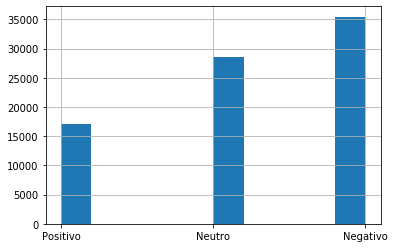

In [5]:
cand1["sentiment"].hist()

In [6]:
cand1

,tweet,sentiment
0,Esperando ansiosa pro BBB hoje e nem acredito ...,Positivo
1,quem votou pro daniel entrar na casa são mesmo...,Positivo
2,Podia tocar “no dia em que eu sai de casa minh...,Neutro
3,"Daniel broxa, Hadson nanopipi... Esse #BBB20 t...",Positivo
4,hj o daniel vai ser eliminado vcs podiam aprov...,Neutro
...,...,...
80970,"Eu amo que o Daniel vai sair essa semana, já e...",Positivo
80971,Mas gentê Daniel tá cansado do prior escapar K...,Neutro
80972,THIAGO:VEM PERDER ESTALECA FORA DA CASA DANIEL...,Negativo
80973,"Nao sei quem é pior, Yvi ou Daniel? Acho que o...",Neutro


# Flayslene

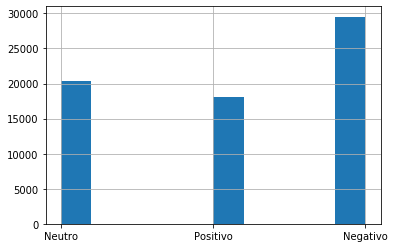

In [7]:
cand2["sentiment"].hist()

In [8]:
cand2

,tweet,sentiment
0,+317,Neutro
1,1603 acumulado.,Neutro
2,primeira vez q eu vejo algo q preste vindo des...,Positivo
3,🎡 MUTIRÃO FLAYOR ENCERRADO 🎡\n\nFeat. @felipep...,Negativo
4,Aí nem vou discutir hahaha antes ela fala que ...,Negativo
...,...,...
67992,"Força FLAY..\n\no TOMBO VAI VIM, NÃO DO JEITO ...",Neutro
67993,Gizelly dizendo que a Flay sai pra eles. 😂 alg...,Negativo
67994,Na real queria Flay x Daniel x Prior a rejeica...,Negativo
67995,oh mas a real é q eu queria q a ivy ou a flay ...,Negativo


# Ivy

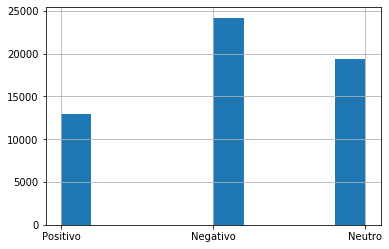

In [9]:
cand3["sentiment"].hist()

In [10]:
cand3

,tweet,sentiment
0,EU VOTEI NO SABUGO VOTE VOCÊ TBM 😍😍😍😍😍😍😍\n\nPa...,Positivo
1,Ivy ninguém te aguenta mais #bbb20,Negativo
2,tava aqui no meu tédio pensando e acho que eu ...,Neutro
3,Não acho necessário o Tiago falar a porcentual...,Negativo
4,Ivy sem saber quem é Marielle de primeira: rac...,Negativo
...,...,...
56447,SE NÃO FOR O DANIEL A GENTE TIRA A IVY \n\ness...,Positivo
56448,Rezando pro Prior escolher o número 3 de prime...,Positivo
56449,"és a duvida, sai ivy ou daniel? pqppppppp #bbb20",Neutro
56450,Momento #BBB : Se o Prior voltar do Bate e Vol...,Neutro


# Quantidades absolutas

In [11]:
candidates = {"daniel": cand1, "flayslene": cand2, "ivy": cand3}

In [12]:
qtds_df = get_raw_quantities(candidates)

In [13]:
qtds_df

,positivos,neutros,negativos
nome,,,
daniel,17050,28476,35449
flayslene,18049,20419,29529
ivy,12919,19342,24191


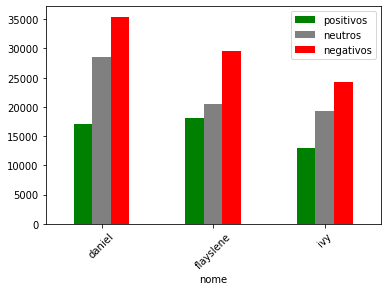

In [14]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação aos total de tweets de cada candidato

In [15]:
pcts_df = get_pct_by_candidate(candidates)

In [16]:
pcts_df

,positivos,neutros,negativos
nome,,,
daniel,0.210559,0.351664,0.437777
flayslene,0.265438,0.300293,0.434269
ivy,0.228849,0.342627,0.428523


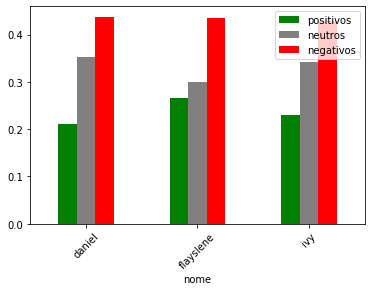

In [17]:
pcts_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação ao total de tweets por categoria

In [18]:
qtds_df_copy = qtds_df.copy()

In [19]:
qtds_df["positivos"] /= qtds_df["positivos"].sum() 
qtds_df["neutros"] /= qtds_df["neutros"].sum()
qtds_df["negativos"] /= qtds_df["negativos"].sum()

In [20]:
qtds_df

,positivos,neutros,negativos
nome,,,
daniel,0.355075,0.417310,0.397548
flayslene,0.375880,0.299236,0.331158
ivy,0.269045,0.283453,0.271294


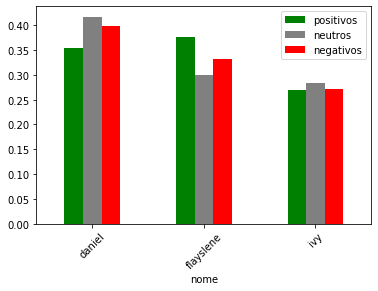

In [21]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Seleção de atributos

In [22]:
atributes_df = qtds_df_copy.join(pcts_df, rsuffix="_pct")

In [23]:
participantes_info = get_participantes_info()
paredoes_info = get_paredoes_info()

In [24]:
followers = [participantes_info[participante]["seguidores"] for participante in atributes_df.index]


In [25]:
paredao_info = paredoes_info[PAREDAO]["candidatos"]
results_info = {candidate["nome"]: candidate["porcentagem"]/100 for candidate in paredao_info}
rejection = [results_info[participante] for participante in atributes_df.index]

In [26]:
atributes_df["seguidores"], atributes_df["rejeicao"] = followers, rejection

In [27]:
atributes_df

,positivos,neutros,negativos,positivos_pct,neutros_pct,negativos_pct,seguidores,rejeicao
nome,,,,,,,,
daniel,17050,28476,35449,0.210559,0.351664,0.437777,33876,0.8082
flayslene,18049,20419,29529,0.265438,0.300293,0.434269,104138,0.0954
ivy,12919,19342,24191,0.228849,0.342627,0.428523,59125,0.0964


In [28]:
atributes_df.to_csv("data/{}/paredao_atributes.csv".format(PAREDAO))

In [29]:
candidate1_df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date', 'translate', 'trans_src', 'trans_dest', 'sentiment',
       'negative_score', 'neutral_score', 'positive_score'],
      dtype='object')